In [1]:
import sys         
sys.path.append('./../')        

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from src.data.load_data import load_ptbxl_data

TARGET = 'diagnostic_class'
DATASET_PATH = Path("./../data/ptbxl")

In [3]:
ptbxl_data = load_ptbxl_data(
    sampling_rate=100,
    path = DATASET_PATH,
    target = TARGET
)

In [4]:
time = np.array([i for i in range(1000)])/100

In [5]:
sns.set()

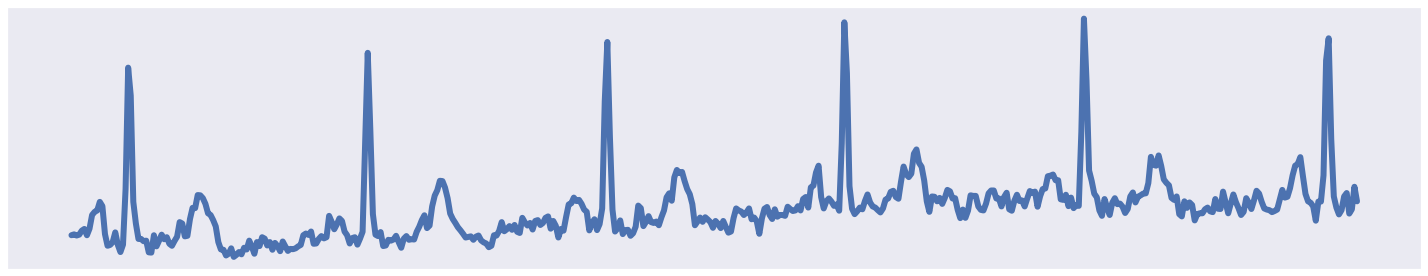

In [6]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=time[:500], y=ptbxl_data['train']['X'][0][:500, 0], lw=6)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
fig.savefig('presentation_examples/ecg.png', transparent=True)

In [7]:
data_lst = ptbxl_data['train']['X'][:5][:, 0]

In [8]:
from biosppy.signals import ecg, ppg

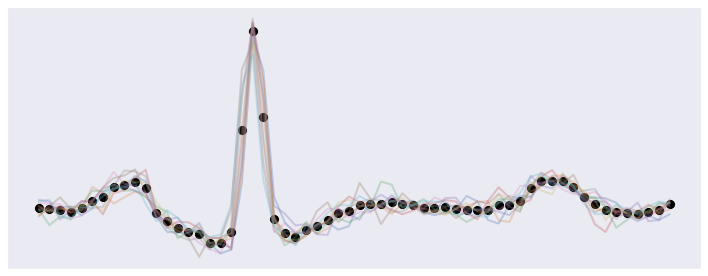

In [9]:
data = ptbxl_data['train']['X'][0][:, 0]
ecg_results = ecg.ecg(data, 100, show=False)
fig, ax = plt.subplots(figsize=(10, 4))

for temp_arr in ecg_results['templates']:
    sns.lineplot(x=ecg_results['templates_ts'], y=temp_arr, lw=2, ax=ax, alpha=0.3)
    
sns.scatterplot(x=ecg_results['templates_ts'], y=ecg_results['templates'].mean(0), s=100, ax=ax, color='black')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()

fig.savefig('presentation_examples/ecg_segments_scatter.png', transparent=True)

In [10]:
rpeaks_loc = ecg_results['rpeaks']

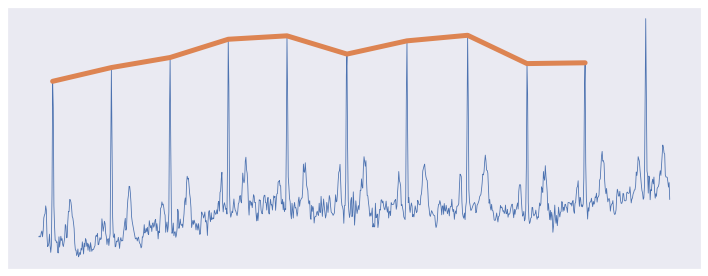

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(x=time, y=data, lw=0.8)
sns.lineplot(x=time[rpeaks_loc], y=data[rpeaks_loc], lw=5)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()

fig.savefig('presentation_examples/rpeaks_DC.png', transparent=True)

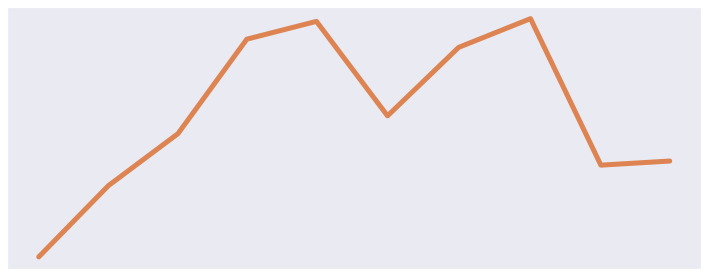

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
# sns.lineplot(x=time, y=data, lw=0.8)
sns.lineplot(x=time[rpeaks_loc], y=data[rpeaks_loc], color=sns.color_palette()[1], lw=5)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()

fig.savefig('presentation_examples/rpeaks_DC_2.png', transparent=True)

<AxesSubplot:>

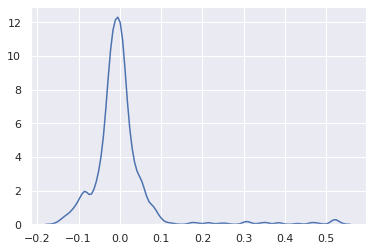

In [151]:
sns.kdeplot(ecg_results['filtered'])

In [100]:
data_lst.shape

(1000, 12)

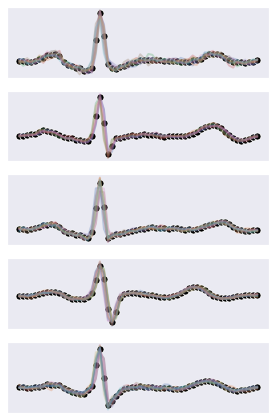

In [107]:
data_lst = ptbxl_data['train']['X'][:5]
# data_lst = ptbxl_data['train']['X'][0]#[:, 0]

fig, axes = plt.subplots(len(data_lst), 1, figsize=(4, 6))

for data, ax in zip(data_lst, axes):
    data = data[:, 0]
    ecg_results = ecg.ecg(data, 100, show=False)
    for temp_arr in ecg_results['templates']:
        sns.lineplot(x=ecg_results['templates_ts'], y=temp_arr, lw=2, ax=ax, alpha=0.3)

    sns.scatterplot(x=ecg_results['templates_ts'], y=ecg_results['templates'].mean(0), s=50, ax=ax, color='black')

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])

    plt.tight_layout()

fig.savefig('presentation_examples/ecg_segments_scatter_5.png', transparent=True)

In [156]:
pd.DataFrame.from_dict({
    ' ': ['sample_1'],
    'R_peak_time': [0.5],
    'R_peak_val': [300],
    'QRS_duration': [0.25],
    'PQ_interval': [0.3],
    '...': ['...']
}).set_index(' ').T

,sample_1
R_peak_time,0.5
R_peak_val,300
QRS_duration,0.25
PQ_interval,0.3
...,...


In [157]:
pd.DataFrame.from_dict({
    ' ': ['sample_1'],
    'kurtosis': [0.5],
    'skewness': [300],
    'mean': [0.25],
    'median': [0.3],
    '...': ['...']
}).set_index(' ').T

,sample_1
kurtosis,0.5
skewness,300
mean,0.25
median,0.3
...,...


In [41]:
pd.DataFrame.from_dict({
    ' ': ['sample_1', '...'],
    'kurtosis': [0.5, '...'],
    'skewness': [300, '...'],
    'mean': [0.25, '...'],
    'median': [0.3, '...'],
    '.': ['...', '...'],
    'most_dominant_frequency': [5, '...'],
    'total_power': [150, '...'],
    'mean_power': [1.5, '...'],
    'mean_frequency': [20, '...'],
    '..': ['...', '...'],
    'R_peak_time': [0.5, '...'],
    'R_peak_val': [300, '...'],
    'QRS_duration': [0.25, '...'],
    'PQ_interval': [0.3, '...'],
    '...': ['...', '...']
}).set_index(' ').T

,sample_1,...
kurtosis,0.5,...
skewness,300,...
mean,0.25,...
median,0.3,...
.,...,...
most_dominant_frequency,5,...
total_power,150,...
mean_power,1.5,...
mean_frequency,20,...
..,...,...


In [33]:
import scipy.fftpack as fftpack

def fft(data, fs, ax=None):
    mags = fftpack.fft(data)
    freqs = fftpack.fftfreq(len(data)) * fs

    ax.stem(freqs, np.abs(mags), use_line_collection=True)
    ax.set_xlabel('Frequency in Hertz [Hz]')
    ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
    ax.set_xlim(-fs/2, fs/2)
    return freqs, mags

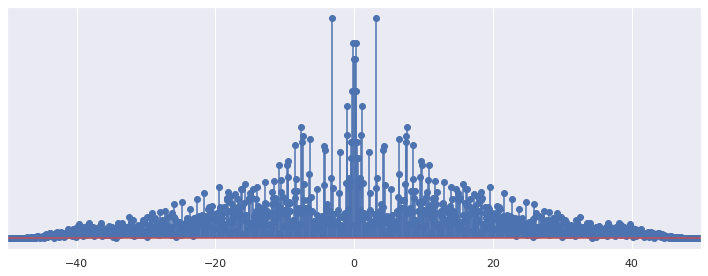

In [35]:
fig, ax = plt.subplots(figsize=(10, 4))

fft(data, 100, ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
fig.savefig('presentation_examples/freq_analysis.png', transparent=True)

/tmp/ipykernel_148068/3906201167.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pc = plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='inferno')
/tmp/ipykernel_148068/3906201167.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(pc)


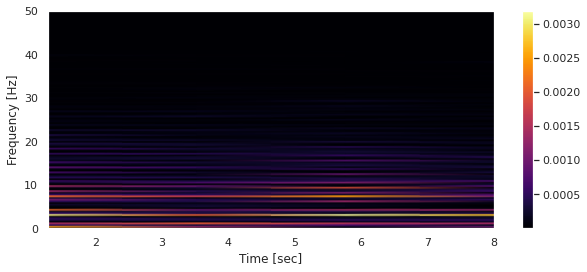

In [30]:
from scipy import signal
import matplotlib as mpl
from scipy.fft import fftshift

fig, ax = plt.subplots(figsize=(10, 4))

f, t, Sxx = signal.spectrogram(data, 100)

pc = plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='inferno')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
fig.colorbar(pc) 
plt.show()
# pc = ax.pcolormesh(t, f, Sxx, norm=mpl.colors.LogNorm(vmin=Sxx.min(), vmax=Sxx.max()), cmap='inferno') 
# ax.set_ylabel('Frequency') 
# ax.set_xlabel('Time')  
# plt.grid(False)
# fig.colorbar(pc) 

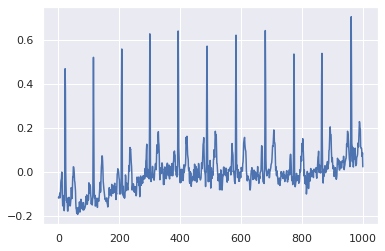

In [19]:
plt.plot(data)